In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , Imputer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold

## Importing data from DRIVE

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credicxo/musk_csv.csv')

Printing first five rows to acknowledge our data.

In [4]:
df.head(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


## Getting Info about no of Columns or features in our data.

In [5]:
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

##  Removing unnecessary columns from our Dataframe and seperating Labels from it.

In [0]:
data = df.drop(columns = 'molecule_name')
data = data.drop(columns = 'conformation_name')
data = data.drop(columns = 'ID')
data = data.drop(columns = 'class')
labels = df['class']


In [39]:
print ("Features---->\n" , data.columns , "\n")
print("Labels---->\n" , labels)

Features---->
 Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165',
       'f166'],
      dtype='object', length=166) 

Labels---->
 0       1
1       1
2       1
3       1
4       1
       ..
6593    0
6594    0
6595    0
6596    0
6597    0
Name: class, Length: 6598, dtype: int64


## Converting Dataframe into Numpy array to perform **Preprocessing**

In [0]:
X = data.values
y = labels.values

In [9]:
X = X.astype('float64')
X.dtype

dtype('float64')

# Checking **Nan** values , just in case.

In [10]:
np.isnan(X).any()

False

## Preprocessing: Scaling

In [0]:

scaler = StandardScaler()
X , y = shuffle(X , y)
train_X , test_X ,train_y , test_y = train_test_split(X , y , test_size = 0.2)
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)


In [41]:
print("Training data:",train_X ,"\n\n")
print("No of true and False Labels in Train set:" , np.unique(train_y , return_counts= True) , "\n\n")
print("Test data:",test_X , "\n\n")
print("No of true and False Labels in Test set:" , np.unique(test_y , return_counts= True) , "\n\n")

Training data: [[-0.26453236 -0.67402585 -0.09693129 ... -0.46643606 -0.54627138
  -0.42574459]
 [-0.35701443 -0.83856788 -1.0382438  ... -0.46643606 -0.81881447
  -0.52203609]
 [-0.28302877  2.24385285  1.30032946 ... -0.33802268 -0.01416345
  -0.60762854]
 ...
 [ 1.52961978 -0.82759841 -1.06765981 ... -0.22795407  0.40114031
   0.06641199]
 [-0.04257539 -0.49851435  0.10898082 ...  0.12059652  0.42709679
   0.93303553]
 [-0.30152519 -0.31203338  1.5503656  ... -0.33802268  0.06370601
  -0.51133704]] 


No of true and False Labels in Train set: (array([0, 1]), array([4459,  819])) 


Test data: [[-0.2513443  -0.56614531 -0.1758386  ... -0.45179581 -0.56262097
  -0.41061504]
 [-0.2513443  -0.85718945 -0.29398174 ... -0.45179581 -0.52077549
  -0.41061504]
 [-0.35172992  2.26593809 -1.01760845 ... -0.11977017  0.27428869
   0.65523743]
 ...
 [-0.09072731  0.30698712  1.16803956 ...  0.0724552   0.4835161
   0.84150291]
 [ 0.00965831  1.70623781  1.77352314 ...  0.1248803   0.31613417
   

# Now we compare three models and see their respective results

## 1) Logistic Regression

In [13]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(train_X , train_y)
print(lr.score(train_X , train_y))
print(lr.score(test_X , test_y))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9569912845774915
0.9492424242424242


Accuracy is quite good and also free from variance, but it seems to have a bit of bias. Therefore lets go to RandomForest

## 2)RandomForest

In [14]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200).fit(train_X , train_y)
print(rf.score(train_X , train_y))
print(rf.score(test_X , test_y))

1.0
0.9734848484848485


As we see our model is giving good accuracy but there is a potential to even perform better. Therefore We try NeuralNetworks

# 3) MLP Classifier

In [34]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model=MLPClassifier(alpha=0.01, batch_size=230, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=100)

model.fit(train_X,train_y)
pred_y = model.predict(test_X)
accuracy=accuracy_score(y_true=test_y, y_pred=pred_y)
print("Accuracy:" , (accuracy))

Accuracy: 0.9954545454545455


We see our acccuracy is almost 100%. Here we may conclude that Random Forest can be a good option for tabular data , as it is easy to train and also is giving good accuracy but we also see that with NeuralNetworks it may demand a bit of caution to train it, but at the end with caution comes pretty awesome results.

## Now Lets take a look at our loss and accuracy curves on training as well as tests sets!!

In [31]:
#Calculating loss and accuracy for specific number of epochs
from sklearn.metrics import log_loss

train_loss = []
test_loss = []
train_Acc = []
test_Acc = []

for i in range(1,51):

  MLP = MLPClassifier(alpha=0.01, batch_size=230, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=i)
  MLP.fit(train_X , train_y)
  
  pred_train_y = MLP.predict(train_X)
  pred_test_y = MLP.predict(test_X)

  train_loss.append(log_loss(train_y , pred_train_y))
  test_loss.append(log_loss(test_y , pred_test_y))

  train_Acc.append(accuracy_score(y_true=train_y, y_pred=pred_train_y))
  test_Acc.append(accuracy_score(y_true=test_y, y_pred=pred_test_y))


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/l

## Now Lets Plot our results

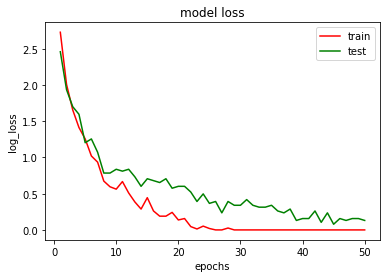

In [32]:
import matplotlib.pyplot as plt
epochs = []
for i in range(1,51):
  epochs.append(i)
  
plt.plot(epochs , train_loss , 'r' , label ='train')
plt.plot(epochs , test_loss , 'g' ,label = 'test')
plt.xlabel('epochs')
plt.ylabel('log_loss')
plt.title('model loss')
plt.legend()
plt.show()

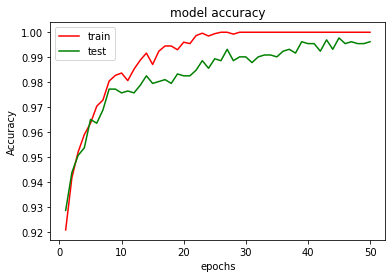

In [33]:
plt.plot(epochs , train_Acc , 'r' , label ='train')
plt.plot(epochs , test_Acc , 'g' ,label = 'test')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('model accuracy')
plt.legend()
plt.show()

As we saw our loss is continuously decreasing on train and test sets and Accuracy is continuously increasing. And also we dont need Early Stopping here.

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,pred_y))
print(classification_report(test_y,pred_y))

[[1118    4]
 [   2  196]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1122
           1       0.98      0.99      0.98       198

    accuracy                           1.00      1320
   macro avg       0.99      0.99      0.99      1320
weighted avg       1.00      1.00      1.00      1320



Saving the models


In [47]:
pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp36-none-any.whl size=5998 sha256=4ec4c32a335ebdfd7e8dd9a7372bf5161656aa0c860f1d33401b43c5f99e86cf
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [0]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# CONCLUSION and REPORT

As we saw the very best results we got through MLP Classifier as compare to RandomForest or Logistic Regression

----------------------------------------Preprocessing

1)-We converted dataframe to Numpy array in oreder to pass it to Sklearn for further opwerations

2)-We applied Standard Scaling to avoid bias problem in our model

3)-Furhter we shuffled our data before splitting as it had only few top rows  for MUSK and rest for NON-MUSK. Avoiding that would have lead the model to learn only predicting MUSK or NON-MUSK data.

4)- we did splitting 80-20 to train-test repectively

----------------------------------------Training MOdels

we trained 3 models Logistic Regression , Random Forest and Mlp Classifier and got the best results from MLP Classifier

-------------------------------------------Post Processing

We trained models for different no of epochs to see the nature of our model in terms of LOSS and ACCURACY

Further we used Matplotlib to plot the graphs

And at very last  we checked our model's classification Report mentioned above.

ThankYou